In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gaussianfunctions as gauss
from estimationgaussian import GaussianEM
from visualizinggaussian import PlotGMM

In [2]:
#Generate data and plot the true pdf
data=gauss.SimulateGMM(168,25,18,7,35)

In [ ]:
#Estimate the distribution AND plot
gauss.GaussianEMPlot(data, k=2,n_iteration=20,iter_plot=5)

In [3]:
#Estimate Only
means,variances,n_iterations=GaussianEM(data,2,15)

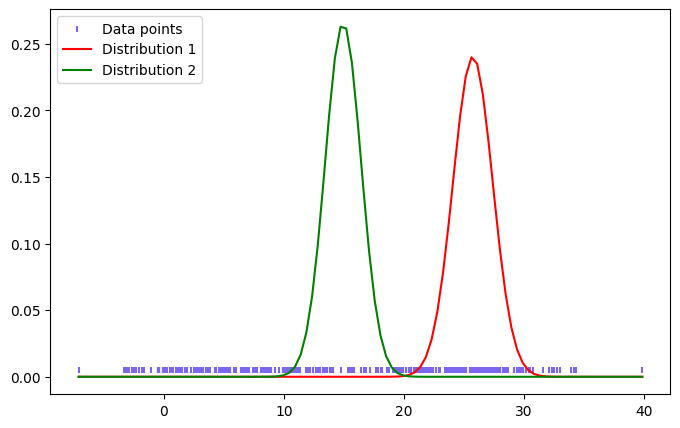

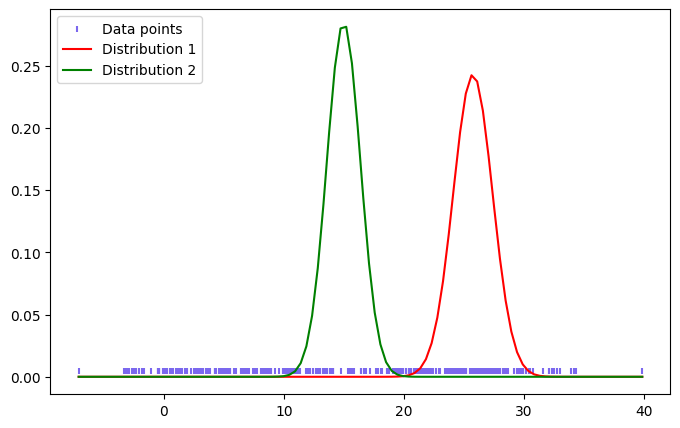

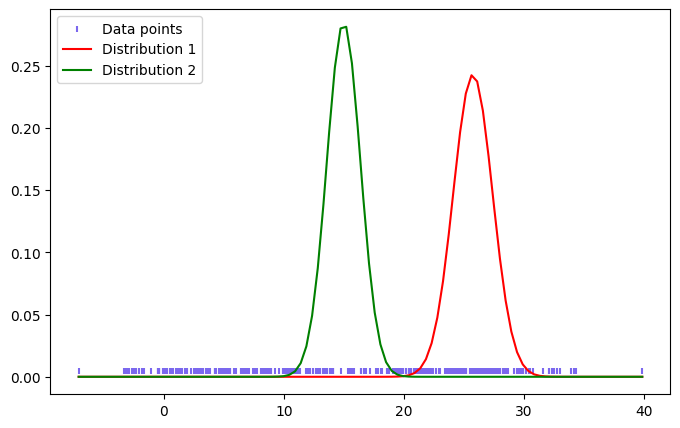

In [4]:
#Plot
PlotGMM(data, means,variances, n_iterations,5)